# Simple Linear Regression

### Problem Statement :- 

    - Build a model to predict delivery time using sorting time

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Preparation

In [2]:
import pandas as pd
import numpy as np
time = pd.read_csv ("~/desktop/Digi 360/Module 6/DataSets-4/delivery_time.csv")
time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
# Renaming the columns

time = time.rename(columns={'Delivery Time':'del_time','Sorting Time':'sort_time'})

In [4]:
##let's describe the DF
time.describe()

,del_time,sort_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
#Median for weight gained
print(time.del_time.median())

17.83


In [6]:
#Median for cals consumed
print(time.sort_time.median())

6.0


Here, the mean is less than the median for delivery time so the distribution is left skewed. 

Whereas, the mean is greater than the median for sorting time so the distribution is right skewed. 


### Visualization

In [7]:
##Boxplot for salary hike
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=time['del_time'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
#Finding outliers for Salary_hike
Q1 =  time['del_time'].quantile(0.25)
Q3 =  time['del_time'].quantile(0.75)
IQR = Q3 - Q1
Outlr = time[(time['del_time'] < Q1-1.5*IQR ) | (time['del_time'] > Q3+1.5*IQR)]['del_time']
print("Outliers:", Outlr)

Outliers: Series([], Name: del_time, dtype: float64)


So, there are no outliers.

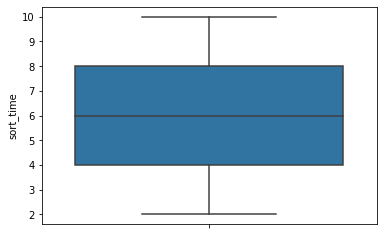

In [9]:
#Boxplot for Churn_out_rate
import seaborn as sns
sns.boxplot(y=time['sort_time'])
plt.show()

In [10]:
###Finding outliers for Churn_out_rate
Q1 =  time['sort_time'].quantile(0.25)
Q3 =  time['sort_time'].quantile(0.75)
IQR = Q3 - Q1
Outlr = time[(time['sort_time'] < Q1-1.5*IQR ) | (time['sort_time'] > Q3+1.5*IQR)]['sort_time']
print("Outliers:", Outlr)


Outliers: Series([], Name: sort_time, dtype: int64)


So, there are no outliers.

Let’s draw scatter diagram to see the relationship between delivery time and sorting time.

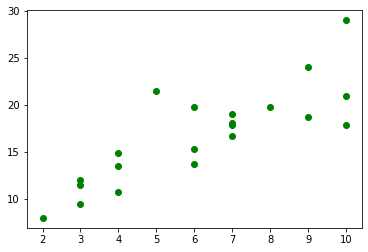

In [11]:
import matplotlib.pylab as plt
plt.scatter(x=time['sort_time'],y=time['del_time'],color='green')
plt.show()

### Finding the correlation

In [12]:
#Finding the correlation coefficient
np.corrcoef(time.sort_time,time.del_time)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

Here the correlation coefficient value is 0.83 which is less than 0.85. So, the relationship between delivery time and sorting time is moderate. 

### Model Building

In [13]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols('del_time ~ sort_time', data = time).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           3.98e-06
Time:                        16:46:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, the linear equation is 
y^ = 6.583 + 1.649x. Here x = sorting time and y^ = delivery time. 

Here p value is less than 0.05 so we reject the null hypothesis. That means there is significant correlation between delivery time and sorting time.

Here we also can see R-squared value is 0.6823 which is less than 0.85. Hence our model is not good and we need to go for transformations.

### Model Evolution

In [14]:
pred = model.predict(pd.DataFrame(time['sort_time']))
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [15]:
#99% CI 
print(model.conf_int(0.01))

                  0          1
Intercept  1.657007  11.508461
sort_time  0.910425   2.387615


In [16]:
#Finding RMSE
res = time.del_time - pred
squares = res * res
mse = np.mean(squares)
rmse = np.sqrt(mse)
rmse

2.7916503270617654

So, we can conclude that our predicted values are 2.79 points deviated from actual values for linear model.

Since R^2 value is less than 0.85, let’s go to exponential model.

### Exponential Model

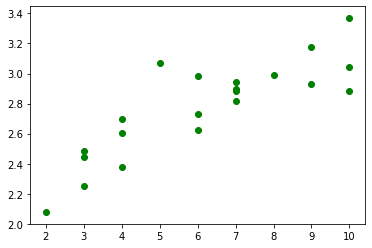

In [17]:
#let's build Exponential model
# x = sort_time and y = log(del_time)
plt.scatter(x=time['sort_time'],y=np.log(time['del_time']),color='green')
plt.show()

In [18]:
#Finding the correlation coefficient
np.corrcoef(time.sort_time,np.log(time.del_time))

array([[1.        , 0.84317726],
       [0.84317726, 1.        ]])

In [19]:
##Building the model
model2 = smf.ols('np.log(del_time) ~ sort_time', data = time).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.59e-06
Time:                        16:46:44   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sort_time      0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can see R-squared value is 0.711 which is still less than 0.85. Hence our model is not so good and we need further transformations.

### Polynomial model with 2 degree

In [20]:
##Building the model
model3 = smf.ols('np.log(del_time) ~ sort_time + I(sort_time * sort_time)', data = time).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           2.20e-06
Time:                        16:46:44   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.6997      0.228      7.441      0.000       1.220       2.180
sort_time                    0.2659      0.080      3.315      0.004       0.097       0.434
I(sort_time * sort_time)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred2_log = model3.predict(pd.DataFrame(time['sort_time']))
pred2_log

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [22]:
pred2 = np.exp(pred2_log)
pred2

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [23]:
#99% CI 
print(model3.conf_int(0.01))

                                 0         1
Intercept                 1.042176  2.357233
sort_time                 0.035007  0.496837
I(sort_time * sort_time) -0.031033  0.005352


In [24]:
#Finding RMSE
res2 = time.del_time - pred2
squares2 = res2 * res2
mse2 = np.mean(squares2)
rmse2 = np.sqrt(mse2)
rmse2

2.799041988740925

So, we can conclude that our predicted values are 2.8 points deviated from actual values.

### Conclusion:- 

    - Built the model with different transformations
    - R^2 value for linear model is 0.68
    - R^2 value for exponential model is 0.71
    - R^2 value for 2 degree polynomial is 0.77
    - If we go higher degree polynomial, model may get overfitting.
    - We can conclude that 2 degree polynomial model is the final model